03 Statistics
===
Calculates Corelation:
- gender questions with each other
- male-female per question
- reality and opinion #means?

Testpower?

In [25]:
#library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
#load data
dfWVS = pd.read_csv('..\\data\\WVS_cleaned_10.csv')
dfHDR = pd.read_csv('..\\data\\HDR.csv')
#define variables
list3Countries=['Germany','China','Turkey']
list5Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia','South Africa','Pakistan']
listGenderQuestions=['job', 'politician', 'university', 'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control']
listDemographicQuestions=['sex', 'age', 'ethnic', 'status', 'top_earner', 'town_size']
listIDColummns=['wave', 'wave_years', 'country', 'respondent_number', 'year']
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
listYears = ['1994-1998','1999-2004','2005-2009','2010-2014','2017-2022']

In [33]:
def listToPathname(strList:[str])->str:
    pathname=""
    for name in strList:
        pathname=pathname+"_"+name
    pathname=pathname[1:]
    return pathname


def plot_corelation_questions(counteries:[str],waves:[str],sexes:[str], save:bool=True):
    dfWVSFilterd = dfWVS[dfWVS.country.isin(counteries)]
    dfWVSFilterd = dfWVSFilterd[dfWVSFilterd.wave.isin(waves)]
    dfWVSFilterd = dfWVSFilterd[dfWVSFilterd.sex.isin(sexes)]

    dfCorelation = pd.DataFrame(index=listGenderQuestions,columns=listGenderQuestions)
    for questionX in listGenderQuestions:
        x = dfWVSFilterd[questionX].values
        for questionY in listGenderQuestions:
            y = dfWVSFilterd[questionY].values
            dfCorelation[questionX][questionY]=pearsonr(x, y)[0] 

    sns.heatmap(dfCorelation.astype(float), annot=True)
    if save:
        plt.savefig('..//plots//heatmap//'+ listToPathname(counteries) + '_' + listToPathname(waves) + '_' + listToPathname(sexes) + '.jpg')
    pass

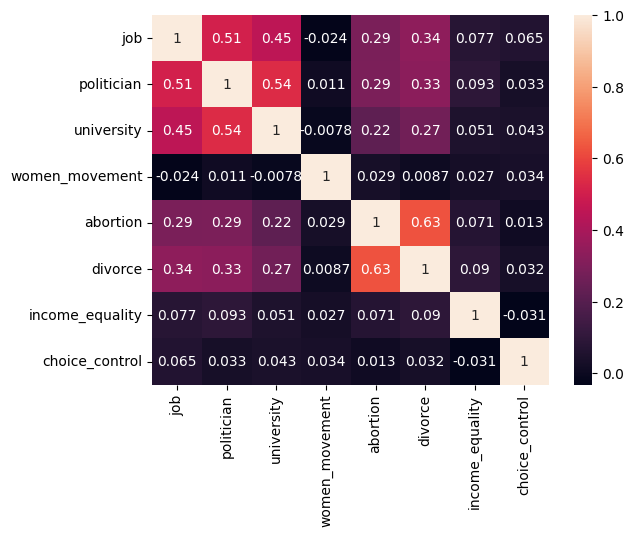

In [40]:
#fig, axs = plt.subplots(nrows=len(listGenderQuestions), ncols=len(listCountries), figsize=(5*len(listCountries), 5*len(listGenderQuestions))) # no "top_earner"
#plt.tight_layout()
plot_corelation_questions(list10Countries, ['WVS7'], ['Male','Female'], False)

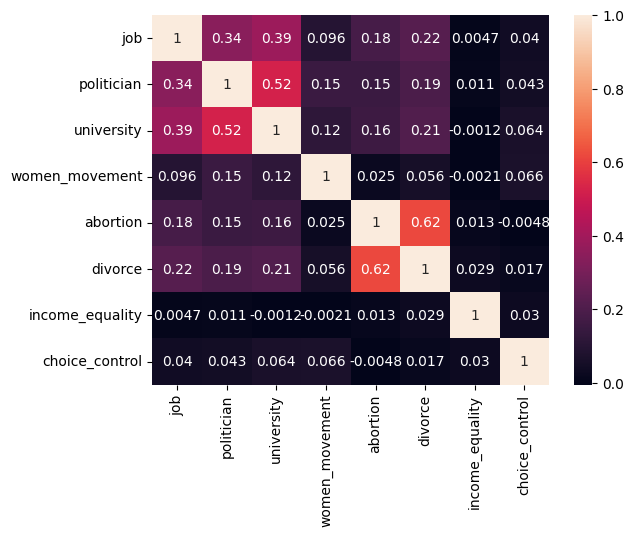

In [42]:
plot_corelation_questions(['Germany'], listWaves, ['Male','Female'], False)

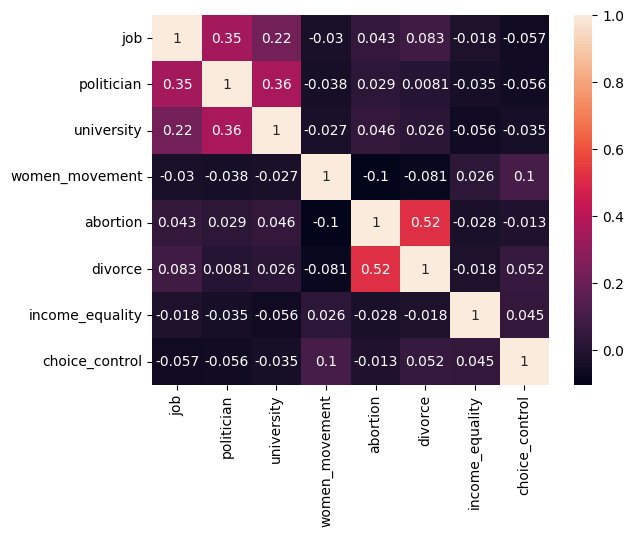

In [37]:
plot_corelation_questions(['China'], ['WVS7'], ['Male'], False)

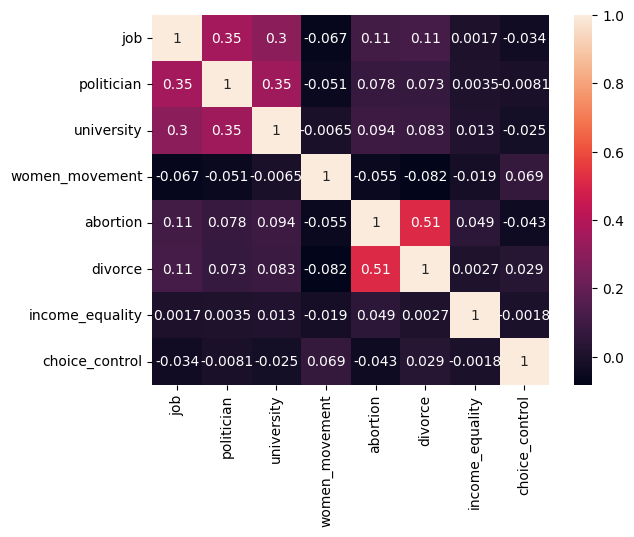

In [38]:
plot_corelation_questions(['China'], ['WVS7'], ['Female'], False)